# SALARY PT. XYZ
BY AZKA BAYU

Link Raw Data : https://www.kaggle.com/datasets/kaggle/sf-salaries

# IMPORT PACKAGE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 500)


# IMPORT DATA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/(PROGRESS) Firm Salary /Salaries.csv')
# df.head(10)

Mounted at /content/drive


# DATA PREPERATION

## CHECK DATA TYPE AND TOTAL VALUES

In [24]:
print('Data Type')
print(df.info())
print('\n Total Values')
print(df.shape)


Data Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB
None

 Total Values
(148654, 13)


## CHANGE DATA TYPE

## CHECK DATA VALUES

In [18]:
for dtype, col in list(zip(df.dtypes, df.columns)):
  if dtype == 'float' or dtype == 'int':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else :
    print(col, dtype)
    print(df[col].unique())
  print()


Id int64
1 148654

EmployeeName object
['NATHANIEL FORD' 'GARY JIMENEZ' 'ALBERT PARDINI' ... 'Charlene D Mccully'
 'Not provided' 'Joe Lopez']

JobTitle object
['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']

BasePay object
[167411.18 155966.02 212739.13 ... '6.04' '15.50' 'Not Provided']

OvertimePay object
[0.0 245131.88 106088.18 ... '102.70' '56.77' 'Not Provided']

OtherPay object
[400184.25 137811.38 16452.6 ... '13.35' 'Not Provided' '-618.13']

Benefits object
[nan 44430.12 69810.19 ... '0.13' '1.24' 'Not Provided']

TotalPay float64
-618.13 567595.43

TotalPayBenefits float64
-618.13 567595.43

Year int64
2011 2014

Notes float64
nan nan

Agency object
['San Francisco']

Status object
[nan 'PT' 'FT']



**Insight**

'Benefit' , 'OtherPay', 'BasePay', 'OvertimePay'

dtype object -> float


## CHANGE DATA TYPE and CLEANING

### Data Cleaning Column Benefit, OtherPay, BasePay, OverTimePay

In [29]:
#Data Cleaning
df['Benefits'] = df['Benefits'].str.replace('Not Provided', '0')
df['OtherPay'] = df['OtherPay'].str.replace('Not Provided', '0')
df['BasePay'] = df['BasePay'].str.replace('Not Provided', '0')
df['OvertimePay'] = df['OvertimePay'].str.replace('Not Provided', '0')

**Insight**

To define Not Provide = 0

### Data Cleaning 'Status'
Define NaN = Unknown

In [33]:
df['Status'] = df['Status'].fillna('Unknown')
df['Status'].unique()

array(['Unknown', 'PT', 'FT'], dtype=object)

### Change Datatype

In [30]:
df['Benefits'] = df['Benefits'].astype(float)
df['OtherPay'] = df['OtherPay'].astype(float)
df['BasePay'] = df['BasePay'].astype(float)
df['OvertimePay'] = df['OvertimePay'].astype(float)

### Check Datatype and Value Again

In [34]:
##Check Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           17582 non-null   float64
 4   OvertimePay       17582 non-null   float64
 5   OtherPay          17582 non-null   float64
 6   Benefits          17582 non-null   float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [35]:
##Check Values
for dtype, col in list(zip(df.dtypes, df.columns)):
  if dtype == 'float' or dtype == 'int':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else :
    print(col, dtype)
    print(df[col].unique())
  print()

Id int64
1 148654

EmployeeName object
['NATHANIEL FORD' 'GARY JIMENEZ' 'ALBERT PARDINI' ... 'Charlene D Mccully'
 'Not provided' 'Joe Lopez']

JobTitle object
['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']

BasePay float64
0.0 92945.87

OvertimePay float64
0.0 28853.64

OtherPay float64
-618.13 89152.01

Benefits float64
-13.8 36581.69

TotalPay float64
-618.13 567595.43

TotalPayBenefits float64
-618.13 567595.43

Year int64
2011 2014

Notes float64
nan nan

Agency object
['San Francisco']

Status object
['Unknown' 'PT' 'FT']



## CHECK MISSING VALUES

### Check Missing Values Each Column

In [36]:
df.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,131072
OvertimePay,131072
OtherPay,131072
Benefits,131072
TotalPay,0
TotalPayBenefits,0
Year,0


In [37]:
column_missing = df.columns[df.isna().any()].tolist()
print(column_missing)

['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Notes']


### Fill Data NaN
because 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits' is float, we can fill with mean, median, or mode

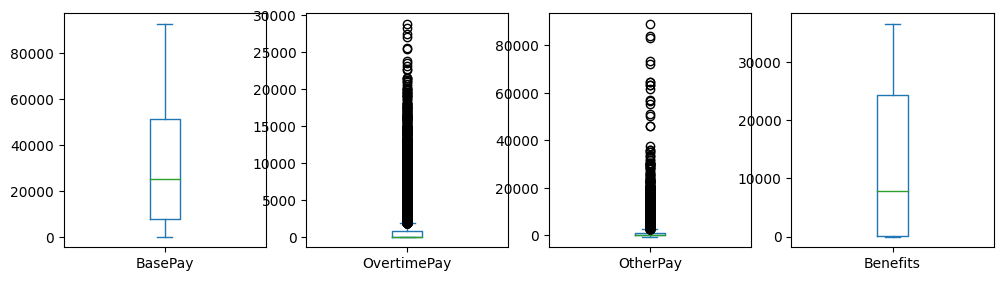

In [44]:
df_to_plot= df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']]
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust()

In [50]:
colmean = df[['BasePay', 'Benefits']]
colmedian = df[['OvertimePay', 'OtherPay']]

df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].mean())
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].median())
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].median())



In [51]:
df.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,0
OvertimePay,0
OtherPay,0
Benefits,0
TotalPay,0
TotalPayBenefits,0
Year,0


### Drop Column 'Notes'
because the value of all row is NaN, so we decide the column is not neccesary

In [52]:
df.drop('Notes', axis=1, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
 11  Status            148654 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 13.6+ MB


## Drop Column Agency
because all values is San Fransisco

In [58]:
df.drop('Agency', axis=1, inplace=True)

# Explanatory Data
1. How have salaries changed over time between different groups of people?

2. How are base pay, overtime pay, and benefits allocated between different groups?

3. What Commen Job Title in Firm?

4. How is budget allocated based on different groups and responsibilities?

In [65]:
for dtype, col in list(zip(df.dtypes, df.columns)):
  if dtype == 'float' or dtype == 'int':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else :
    print(col, dtype)
    print(df[col].unique())
  print()


Id int64
1 148654

EmployeeName object
['NATHANIEL FORD' 'GARY JIMENEZ' 'ALBERT PARDINI' ... 'Charlene D Mccully'
 'Not provided' 'Joe Lopez']

JobTitle object
['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']

BasePay float64
0.0 92945.87

OvertimePay float64
0.0 28853.64

OtherPay float64
-618.13 89152.01

Benefits float64
-13.8 36581.69

TotalPay float64
-618.13 567595.43

TotalPayBenefits float64
-618.13 567595.43

Year int64
2011 2014

Status object
['Unknown' 'PT' 'FT']



## 1. How have salaries changed over time between different groups of people?



In [64]:
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,29219.87,0.00,179.95,11467.58,567595.43,567595.43,2011,Unknown
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),29219.87,0.00,179.95,11467.58,538909.28,538909.28,2011,Unknown
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),29219.87,0.00,179.95,11467.58,335279.91,335279.91,2011,Unknown
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,29219.87,0.00,179.95,11467.58,332343.61,332343.61,2011,Unknown
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",29219.87,0.00,179.95,11467.58,326373.19,326373.19,2011,Unknown


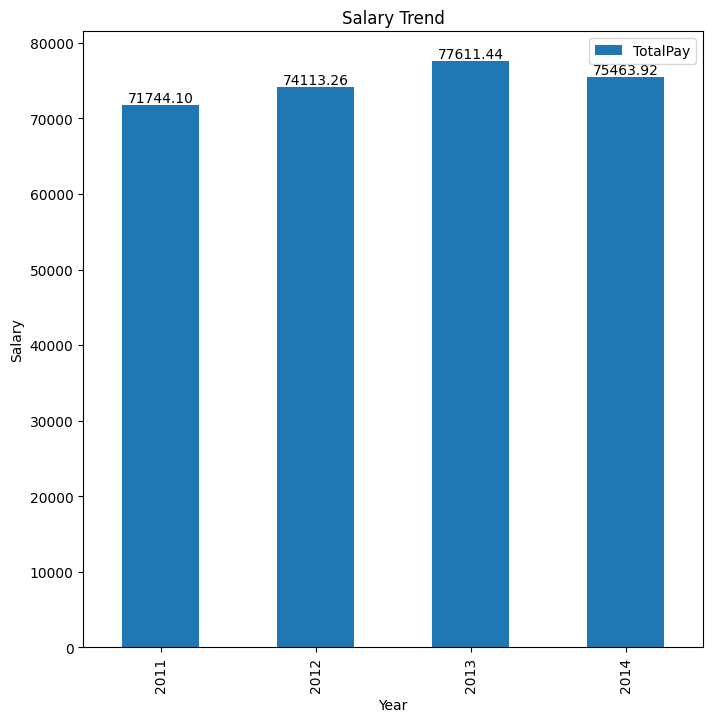

In [90]:
salary_trend = df.groupby('Year')['TotalPay'].mean().reset_index()

ax = salary_trend.plot(kind="bar", x="Year", y="TotalPay", figsize=(8,8))

for index, value in enumerate(salary_trend['TotalPay']):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom')

ax.set_title('Salary Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
plt.show()

## 2. How are base pay, overtime pay, and benefits allocated between different groups?

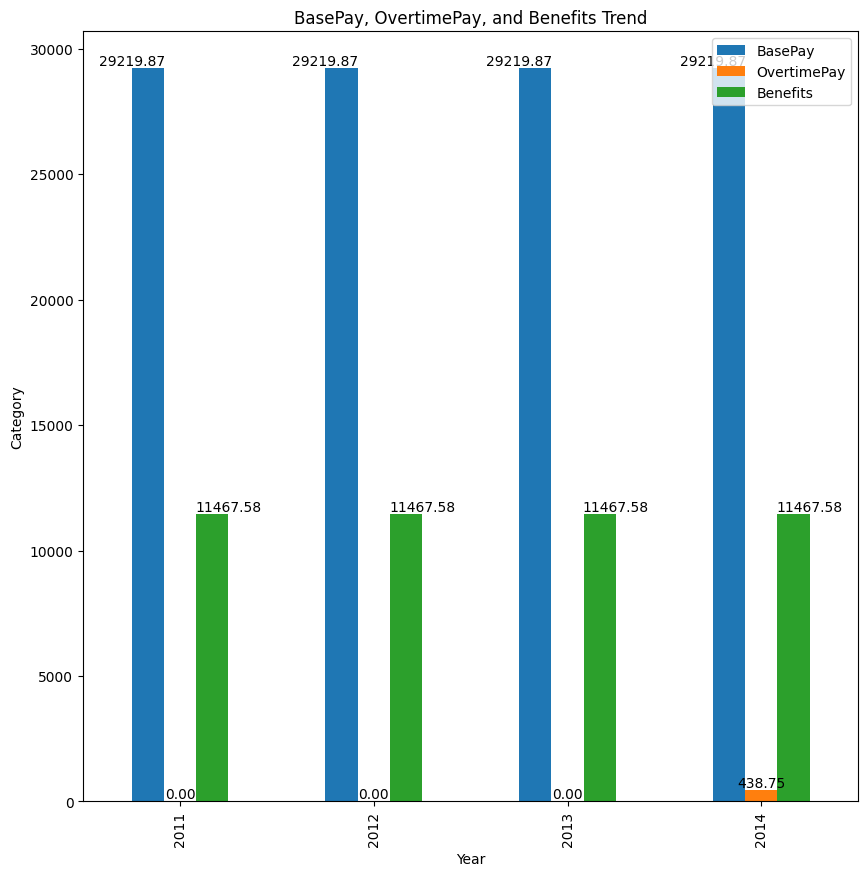

In [92]:
colgroup = df.groupby('Year')[['BasePay', 'OvertimePay', 'Benefits']].mean().reset_index()

ax = colgroup.plot(kind="bar", x="Year", figsize=(10,10))

for i in range(len(colgroup)):
    for j, column in enumerate(['BasePay', 'OvertimePay', 'Benefits']):
        ax.text(i + j/4 - 0.25, colgroup[column].iloc[i], f'{colgroup[column].iloc[i]:.2f}',
                ha='center', va='bottom')

ax.set_title('BasePay, OvertimePay, and Benefits Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Category')
plt.show()

## 3. What Common Job Title in Firm and How Total Pay in Each Common Job Title?

### The Most Job Title

<Axes: xlabel='JobTitle'>

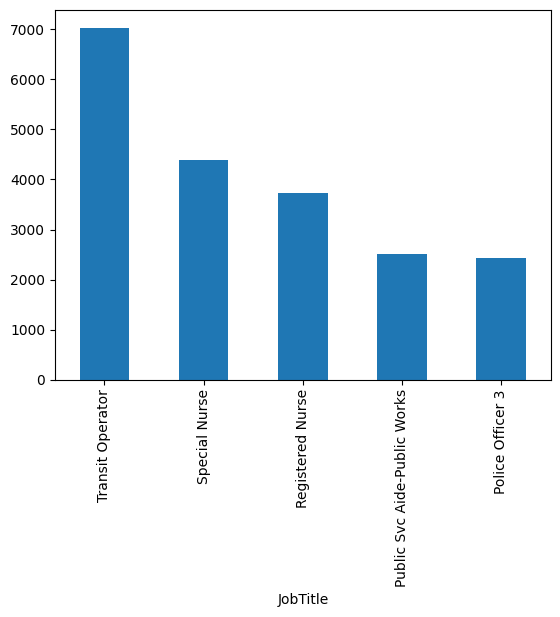

In [7]:
df['JobTitle'].value_counts()[:5].plot(kind='bar')

### Check Total Pay from 5 most job title list by each job title

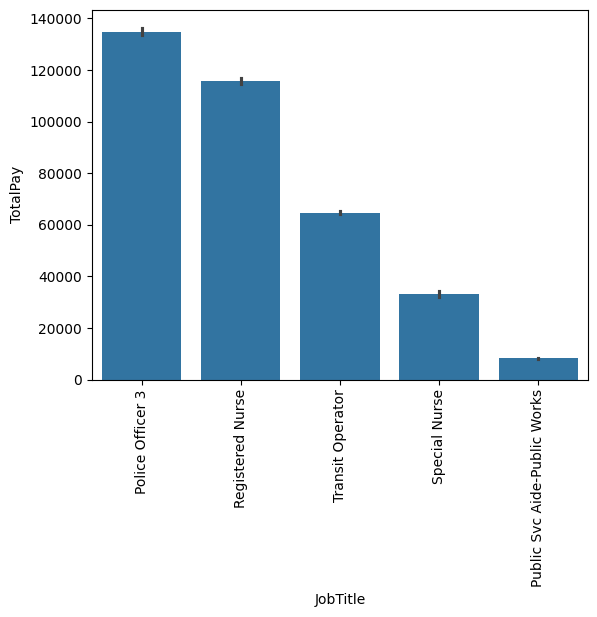

In [14]:
top5 = df['JobTitle'].value_counts()[:5].index.tolist()
# for job in top5:
#   print(job)
#   print(df[df['JobTitle'] == job]['TotalPay'].sum())

sns.barplot(x='JobTitle', y='TotalPay', data=df[df['JobTitle'].isin(top5)])
plt.xticks(rotation=90)
plt.show()

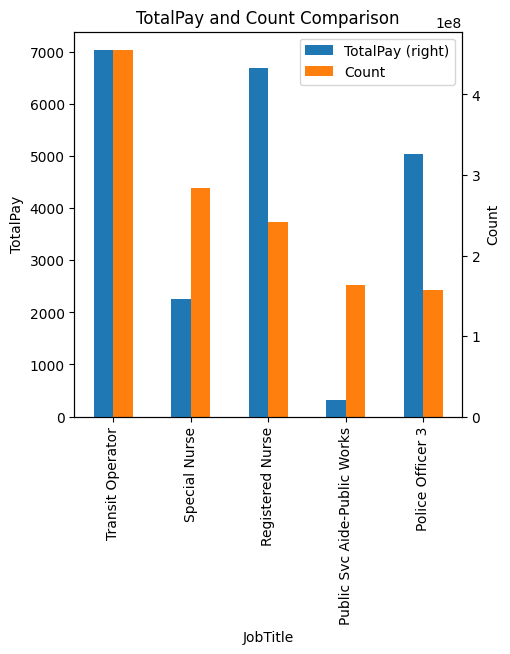

In [29]:
top5 = df['JobTitle'].value_counts()[:5].index.tolist()
top5totalpay = [df[df['JobTitle'] == job]['TotalPay'].sum() for job in top5]
top5count = df['JobTitle'].value_counts()[:5].values

comparison_df = pd.DataFrame({'JobTitle': top5, 'TotalPay': top5totalpay, 'Count': top5count})

ax = comparison_df.plot(kind="bar", x="JobTitle", figsize=(5,5), secondary_y=['TotalPay'])

ax.set_title('TotalPay and Count Comparison')
ax.set_xlabel('JobTitle')
ax.set_ylabel('TotalPay')
ax.right_ax.set_ylabel('Count')
plt.show()

**Insight**

In the Special Nurse and Public Svc job titles between the number of workers and total pay there is a disconnect where the number of workers is more than the total pay, meaning that it can be assumed that workers in these job titles have a lower income per person compared to other job titles.


- Police Officer 3 has a high ratio of headcount to total pay. It can be assumed that the income per person at Police Officer 3 is relatively high.

In [31]:
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
